# Initial Train Test Split and Convolutional Neural Network Modeling Exploration with 10 Classes

## Set Up

In [17]:
# Import Necessary Libraries
import zipfile
import os
import matplotlib.pyplot as plt
import shutil
import pandas as pd
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from sklearn.metrics import classification_report

#### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Bring in Original Data CSV

In [14]:
kaggle_doodle_df = pd.read_csv("/content/drive/MyDrive/Capstone/master_doodle_dataframe.csv")
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,data/traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,data/traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,data/traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,data/traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,data/traffic light/5572841187573760.png


In [15]:
kaggle_doodle_df['image_path'] = kaggle_doodle_df['image_path'].str.replace('data/', '')
kaggle_doodle_df.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,RO,"[[[0, 5, 3, 4, 10, 72, 82, 91, 99, 98, 87, 71,...",5613582005829632,True,traffic light,traffic light/5613582005829632.png
1,US,"[[[0, 255], [3, 4]], [[86, 73, 73, 76, 85, 130...",5769631006457856,True,traffic light,traffic light/5769631006457856.png
2,ZA,"[[[39, 33, 34, 39, 52, 61, 66, 65, 67, 71], [2...",4999795544424448,True,traffic light,traffic light/4999795544424448.png
3,VN,"[[[12, 9], [128, 255]], [[0, 23, 36, 37, 42, 5...",4878417906368512,True,traffic light,traffic light/4878417906368512.png
4,HU,"[[[9, 7, 0, 19, 49, 90, 96, 99, 93, 94, 62, 16...",5572841187573760,True,traffic light,traffic light/5572841187573760.png


### Limit Initial Exploration to 10 Drawing Types for Better Computational Feasibility

In [16]:
words_to_keep = ['bat', 'line', 'circle', 'airplane','octagon', 'bathtub', 'angel', 'book', 'campfire','candle']

In [17]:
data_subset = kaggle_doodle_df[kaggle_doodle_df['word'].isin(words_to_keep)]

In [ ]:
data_subset.head()

,countrycode,drawing,key_id,recognized,word,image_path
39000,US,"[[[0, 8, 12, 15, 19, 32, 57, 127, 141, 144, 14...",5467297722400768,True,candle,candle/5467297722400768.png
39001,SE,"[[[2, 0], [91, 247]], [[9, 4, 2], [85, 83, 76]...",6514271699599360,True,candle,candle/6514271699599360.png
39002,US,"[[[1, 0, 7, 33, 35, 40, 42], [255, 169, 134, 1...",4800698476658688,True,candle,candle/4800698476658688.png
39003,GB,"[[[12, 20, 20, 33, 76, 88, 89, 64, 60, 8, 0], ...",5143361302298624,True,candle,candle/5143361302298624.png
39004,US,"[[[6, 6, 10, 10, 19, 19, 22, 29, 46, 53, 86, 8...",6521918616240128,True,candle,candle/6521918616240128.png


In [ ]:
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
categ = le.fit_transform(data_subset['word'])
data_subset['word'] = categ
data_subset.head()

In [ ]:
train_csv = data_subset.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_0.csv', index=False)

In [ ]:
train_csv = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_0.csv')
train_csv.head()

,countrycode,drawing,key_id,recognized,word,image_path
0,US,"[[[0, 8, 12, 15, 19, 32, 57, 127, 141, 144, 14...",5467297722400768,True,6,candle/5467297722400768.png
1,SE,"[[[2, 0], [91, 247]], [[9, 4, 2], [85, 83, 76]...",6514271699599360,True,6,candle/6514271699599360.png
2,US,"[[[1, 0, 7, 33, 35, 40, 42], [255, 169, 134, 1...",4800698476658688,True,6,candle/4800698476658688.png
3,GB,"[[[12, 20, 20, 33, 76, 88, 89, 64, 60, 8, 0], ...",5143361302298624,True,6,candle/5143361302298624.png
4,US,"[[[6, 6, 10, 10, 19, 19, 22, 29, 46, 53, 86, 8...",6521918616240128,True,6,candle/6521918616240128.png


In [ ]:
print(len(train_csv))

30000


In [19]:
x = data_subset.drop('word', axis=1)
y = data_subset['word']
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.3, random_state=33, stratify=y)

In [20]:
valid_x, test_x, valid_y, test_y = train_test_split(valid_x, valid_y, test_size=0.5, random_state=33, stratify=valid_y)

# Convolutional Neural Net Model

In [5]:
batch_size = 64

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)

        self._to_linear = None
        self._compute_input_size()

        self.fc1 = nn.Linear(self._to_linear, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def _compute_input_size(self):
        with torch.no_grad():
            x = torch.randn(1, 1, 64, 64)
            x = self.pool(F.relu(self.conv1(x)))
            x = self.pool(F.relu(self.conv2(x)))
            print(x.view(x.size(0), -1).size())
            self._to_linear = x.view(x.size(0), -1).size(1)


cnn_model = CNN()

torch.Size([1, 2704])


#### Set Optimizer

In [ ]:
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

### Show Image Before and After Resizing and Thresholding

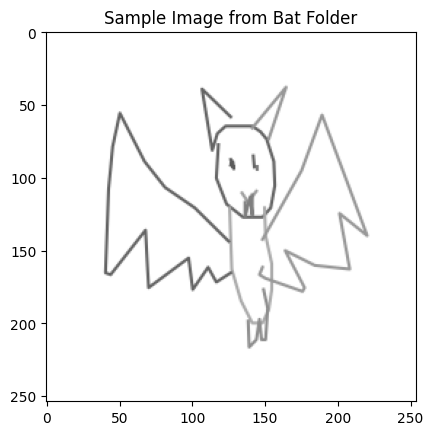

In [ ]:
image_cv2 = cv2.imread("/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/bat/6482096434446336.png")
image_rgb = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title("Sample Image from Bat Folder")
plt.show()

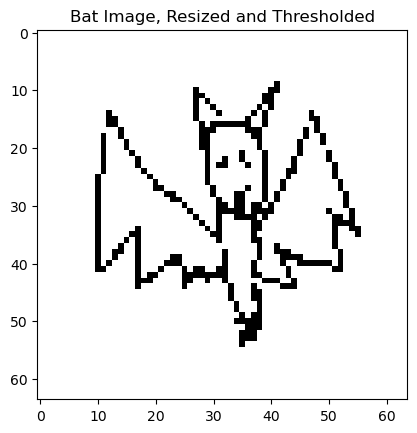

In [27]:
image_cv2 = cv2.imread("/content/drive/MyDrive/Capstone/kaggle_doodles/doodle/bat/6482096434446336.png")
image_gray = cv2.cvtColor(image_cv2, cv2.COLOR_BGR2GRAY)
image_resized = cv2.resize(image_gray, (64, 64))
_, image_thresholded = cv2.threshold(image_resized,250,255,cv2.THRESH_BINARY)
plt.imshow(image_thresholded, cmap='gray')
plt.title("Bat Image, Resized and Thresholded")
plt.show()

### Create Train CSV for Data Loader

In [ ]:
train_xy = pd.concat([train_x, train_y], axis=1)
train_xy.head()

,countrycode,drawing,key_id,recognized,image_path,word
39612,CA,"[[[53, 17, 8, 4, 0, 5, 9, 18, 79, 86, 89, 81, ...",4711610167853056,True,candle/4711610167853056.png,6
991221,RS,"[[[115, 99, 89, 74, 66, 56, 46, 19, 1, 1, 10, ...",6328548115611648,True,bat/6328548115611648.png,2
770860,CA,"[[[0, 15, 87, 102, 102, 73, 32, 5, 7, 0], [24,...",5914045557243904,True,octagon/5914045557243904.png,9
312955,US,"[[[93, 139, 151, 157, 145, 133, 121, 102, 89, ...",4921001567584256,True,angel/4921001567584256.png,1
112003,US,"[[[75, 16, 81, 174, 106, 79, 63, 58], [172, 23...",5144739785474048,True,campfire/5144739785474048.png,5


In [ ]:
train_xy_csv = train_xy.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv', index=False)

In [ ]:
train_xy = pd.read_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv')

### Create Dataset and Data Loader

In [25]:
class DoodleDataset(Dataset):
    def __init__(self, annotations_file, image_root_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = image_root_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx, 4].replace('data/', '')
        img_path = os.path.join(self.img_dir, img_path)

        image = Image.open(img_path).convert("L")

        label = int(self.img_labels.iloc[idx, 5])

        if self.transform:
            image = self.transform(image)

        if self.target_transform:
            label = self.target_transform(label)

        return image, label


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device))),
    transforms.Normalize((0.5,), (0.5,))
])

training_data = DoodleDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle",
    transform=transform
)

train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

img, lbl = training_data[0]
print(type(img))
print(img.shape)
print(lbl)

for images, labels in train_dataloader:
    print("Batch Image Shape:", images.shape)
    print("Batch Label Shape:", labels.shape)
    break

<class 'torch.Tensor'>
torch.Size([1, 64, 64])
6
Batch Image Shape: torch.Size([32, 1, 64, 64])
Batch Label Shape: torch.Size([32])


### Create Test CSV

In [26]:
test_xy_csv = test_xy.to_csv('/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv', index=False)
test_data = DoodleDataset(annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv",
                          image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle")
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
training_data = DoodleDataset(annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/train_xy.csv",
                              image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle")

In [ ]:
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)

### Train Model

In [ ]:
criterion = torch.nn.CrossEntropyLoss()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
print(len(train_dataloader))
train_dataloader = DataLoader(training_data, batch_size=32, shuffle=True, num_workers=32, pin_memory=True)

scaler = torch.cuda.amp.GradScaler()

for epoch in range(50):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        
        with torch.cuda.amp.autocast():
            outputs = cnn_model(inputs)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


### Save Model

In [ ]:
torch.save(cnn_model.state_dict(), '/content/drive/MyDrive/Capstone/cnn_model_7march.pth')

### Load Saved Model Weights

In [ ]:
cnn_model.load_state_dict(torch.load('/content/drive/MyDrive/Capstone/cnn_model_7march.pth'))

### Model Outputs and Accuracy
#### Output on Training Dataset

In [ ]:
cnn_model.eval()
with torch.no_grad():
    for data in train_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)


In [10]:
all_predictions = []
all_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
cnn_model.eval()
with torch.no_grad():
    for data in train_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

21000
21000


##### Classification Report

In [12]:
print(classification_report(all_labels, all_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2100
           1       1.00      1.00      1.00      2100
           2       1.00      1.00      1.00      2100
           3       1.00      1.00      1.00      2100
           4       1.00      1.00      1.00      2100
           5       1.00      1.00      1.00      2100
           6       1.00      1.00      1.00      2100
           7       1.00      1.00      1.00      2100
           8       0.99      1.00      1.00      2100
           9       1.00      1.00      1.00      2100

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



#### Test on Unseen Testing Data

In [28]:
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.where(x < 1.0, torch.tensor(0.0, dtype=torch.float32, device=x.device), torch.tensor(1.0, dtype=torch.float32, device=x.device))),
    transforms.Normalize((0.5,), (0.5,))
])

test_data = DoodleDataset(
    annotations_file="/content/drive/MyDrive/Capstone/kaggle_doodles/test_xy.csv",
    image_root_dir="/content/drive/MyDrive/Capstone/kaggle_doodles/doodle",
    transform=test_transform
)

test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

img, lbl = test_data[0]
print(type(img))
print(img.shape)
print(lbl)

<class 'torch.Tensor'>
torch.Size([1, 64, 64])
4


In [29]:
test_all_predictions = []
test_all_labels = []

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cnn_model.to(device)
cnn_model.eval()
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)

        outputs = cnn_model(images)
        _, predicted = torch.max(outputs.data, 1)

        test_all_predictions.extend(predicted.cpu().numpy())
        test_all_labels.extend(labels.cpu().numpy())

print(len(test_all_predictions))
print(len(test_all_labels))


4500
4500


#### Classification Report

In [30]:
print(classification_report(test_all_labels, test_all_predictions))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       450
           1       0.92      0.93      0.92       450
           2       0.91      0.89      0.90       450
           3       0.93      0.94      0.94       450
           4       0.96      0.94      0.95       450
           5       0.95      0.96      0.95       450
           6       0.95      0.95      0.95       450
           7       0.96      0.94      0.95       450
           8       0.95      0.97      0.96       450
           9       0.92      0.93      0.93       450

    accuracy                           0.94      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.94      0.94      0.94      4500



#### Test on Single Example

In [32]:
test_example = test_data[0]
test_image, test_label = test_example

output = cnn_model(test_image.unsqueeze(0).to(device))
_, predicted = torch.max(output.data, 1)
print (predicted)
print (test_label)


tensor([4], device='cuda:0')
4
